In [5]:
Name = "Kiet Nguyen"

# Project Introduction


## Overview
This project explores the airbnb dataset to find the possible factors that make an airbnb have a good price. This mainly focus on the how the airbnb is operated, and not the location of the airbnb.

## Dataset
The dataset can be found in the following link: https://www.kaggle.com/datasets/lovishbansal123/airbnb-data.

# Preperation steps
## Importing the dataset and libraries


In [6]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
from sklearn import linear_model
import itertools
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Airbnb_Data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## Exploring our dataset

In [8]:
print(df.shape)

(74111, 29)


In [9]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [10]:
df.describe

<bound method NDFrame.describe of              id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,

In [11]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

## Data munging and cleaning

We are dropping some columns that are not predictors to our model:

In [12]:
df = df.drop(["id", "first_review", "host_has_profile_pic", "description", "host_identity_verified", "last_review", 
              "latitude", "longitude", "name", "thumbnail_url", "neighbourhood", "city", "zipcode"], axis = 1)

In [13]:
df.isnull().sum()

log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 200
bed_type                    0
cancellation_policy         0
cleaning_fee                0
host_response_rate      18299
host_since                188
instant_bookable            0
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

"host_reponse_rate" is string type, so we need to convert it to float tpye for comparision.

<AxesSubplot:xlabel='host_response_rate', ylabel='Density'>

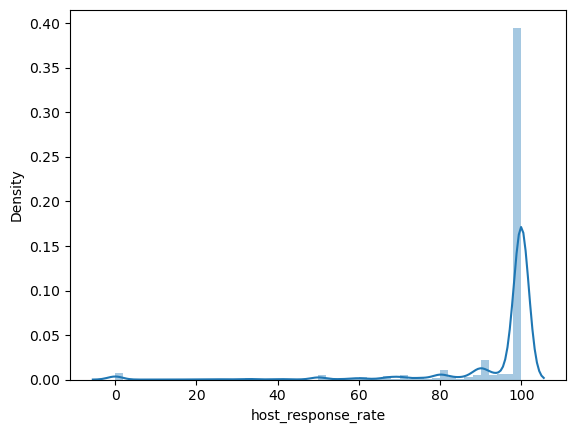

In [14]:
# The following code remove "%" sign from the string and covert it to a number
df['host_response_rate'] = [float(rp.strip("%")) if pd.notnull(rp) else None
                            for rp in df['host_response_rate']]

sns.distplot(df['host_response_rate'])

"Amenities" is a string listing all provided service. We want to count how many amenities the airbnb provides, which is a better metric to compare for our regression model. Then, we drop the "Amenities" column

<AxesSubplot:xlabel='amenities_c', ylabel='Density'>

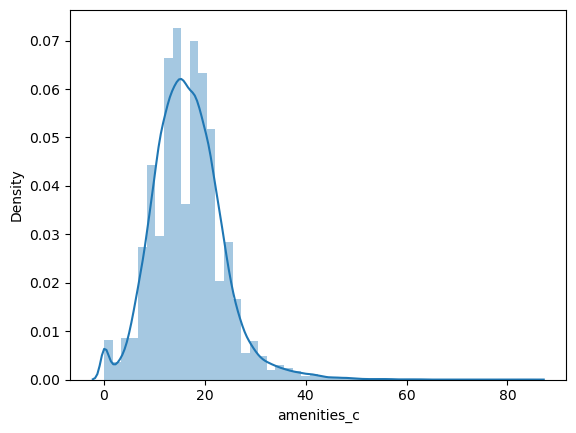

In [15]:
# The following code counts how many amenities provided in the string
df["amenities_c"] = [amenity.count(",") for amenity in df["amenities"]]
df = df.drop(["amenities"], axis = 1)

sns.distplot(df['amenities_c'])

For "host_since" field, we want to replace this with the year of hosting experience, also for the sake of comparing. 

<AxesSubplot:xlabel='year_of_hosting', ylabel='Density'>

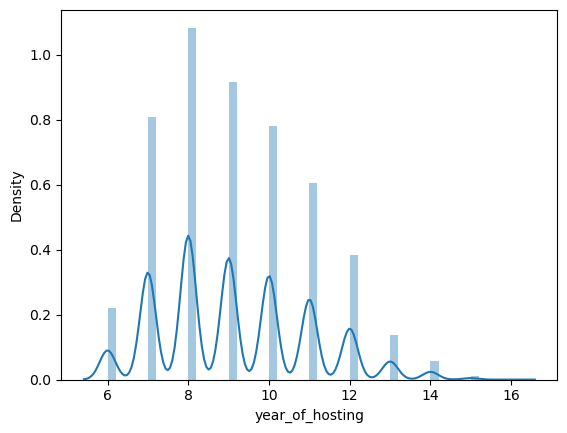

In [16]:
from datetime import datetime

max_date = datetime.now()

# Calculating YOH 
df["year_of_hosting"] = [(max_date - datetime.strptime(str(host), "%Y-%m-%d")).days // 365 
                          if pd.notnull(host) else None
                          for host in df["host_since"]]
df = df.drop(["host_since"], axis = 1)

sns.distplot(df['year_of_hosting'])

The Ordinal fields are: "property_type", "room_type", "bed_type", "cancellation_policy", and "instance_bookable"

In [17]:
# Transform Ordinal data to numbers
colnames = df.columns
ordinal_columns = ["property_type","room_type","bed_type","cancellation_policy",
                    "cleaning_fee","instant_bookable"]
enc = OrdinalEncoder()

# Keep the log_price, transform all other data
df[ordinal_columns] = enc.fit_transform(df[ordinal_columns])

df_encoded = pd.DataFrame(df, columns = colnames)

Instead of dropping NA value, we use the "ffill" method.

In [18]:
# set seed
np.random.seed(12152001)

# randomize data before filling the na values
df_encoded = df_encoded.sample(frac = 1)

df_encoded.fillna(method="ffill", inplace=True)
df_encoded.isnull().sum()

log_price               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
host_response_rate      0
instant_bookable        0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
amenities_c             0
year_of_hosting         0
dtype: int64

The following is the result of our data munging process.

In [19]:
df_encoded.describe

<bound method NDFrame.describe of        log_price  property_type  room_type  accommodates  bathrooms  bed_type  \
54565   4.007333            0.0        1.0             2        1.0       4.0   
18216   5.010635            0.0        0.0             6        1.0       4.0   
49206   4.744932            0.0        0.0             2        1.0       4.0   
53137   4.787492            0.0        0.0             4        1.0       4.0   
60557   3.433987           16.0        0.0             1        1.0       4.0   
...          ...            ...        ...           ...        ...       ...   
72352   5.068904            0.0        0.0             4        2.0       4.0   
31890   5.579730            0.0        0.0             2        1.0       4.0   
26395   4.369448            0.0        2.0             2        1.0       4.0   
71270   6.396930            0.0        0.0             5        3.0       4.0   
25476   4.605170           17.0        0.0             5        1.0       4

## Preparing train and test sets

In [20]:
trainsize = round(len(df_encoded)*0.7)

# 70 training - 30 test
train_set = df_encoded[:trainsize].reset_index(drop = True)
test_set = df_encoded[trainsize:].reset_index(drop = True)

print(train_set.shape)
print(test_set.shape)

(51878, 16)
(22233, 16)


In [21]:
# Our Y is review_scores_rating, X is all other

# Set up train set
trainY = train_set["log_price"]
trainX = train_set.drop("log_price", axis = 1)

# Set up test set
testY = test_set["log_price"]
testX = test_set.drop("log_price", axis = 1)

testY.head()

0    5.010635
1    4.744932
2    3.784190
3    5.298317
4    5.003946
Name: log_price, dtype: float64

# Linear Regression with Exhaustive Subset Selection

## Helper functions

Note: $${R_{adj}}{^2} = 1-(1-{R^2}) \times \frac{n-1}{n-k-1}$$

In [62]:
# Calculate SSE of a linear model
def eval_SSE(X, Y):
    lm = linear_model.LinearRegression(fit_intercept = True)
    lm.fit(X,Y)
    return mean_squared_error(lm.predict(X), Y), lm

def eval_R_squared_adj(lm, X, Y, k, n):
    return 1 - ( (1 - lm.score(X,Y))*(n-1)/(n- k -1))

def eval_R_squared(lm, X, Y):
    return lm.score(X,Y)

## Find the best features for each subset

In [63]:
# SSE compares models with same k, BIC compares models with different k
SSE_list, features_list = [], []

k = trainX.shape[1] #15 max features
best_lm_of_k = []

for num_feature in range(k):
    # initiate min_SSE for the kth iteration
    min_SSE = float('inf')
    best_model = None
    corresponding_feature = () #tuple of features

    
    for combo in itertools.combinations(trainX.columns,num_feature+1):
        # setting up temporary SSE
        temp_SSE = eval_SSE(trainX[list(combo)], trainY)
        temp_model = temp_SSE[1]
        
        if temp_SSE[0] < min_SSE:
            min_SSE = temp_SSE[0]
            corresponding_feature = combo
            best_model = temp_SSE[1]
            
            
    # Store SSE and list of features returning that SSE        
    SSE_list.append(min_SSE)
    best_lm_of_k.append(best_model)
    features_list.append(corresponding_feature)
    
print(features_list)

[('room_type',), ('room_type', 'bedrooms'), ('room_type', 'accommodates', 'bedrooms'), ('room_type', 'accommodates', 'bathrooms', 'bedrooms'), ('room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds'), ('room_type', 'accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds'), ('room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating', 'bedrooms', 'beds'), ('room_type', 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'year_of_hosting'), ('room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'year_of_hosting'), ('room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'amenities_c', 'year_of_hosting'), ('room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'instant_bookable', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'amenities_c', 'year_of_ho

In [64]:
# Print best subset for each k:
for count, subset in enumerate(features_list):
    print("Best subet for k = " + str(count + 1) + " is " + str(list(subset)))

Best subet for k = 1 is ['room_type']
Best subet for k = 2 is ['room_type', 'bedrooms']
Best subet for k = 3 is ['room_type', 'accommodates', 'bedrooms']
Best subet for k = 4 is ['room_type', 'accommodates', 'bathrooms', 'bedrooms']
Best subet for k = 5 is ['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
Best subet for k = 6 is ['room_type', 'accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds']
Best subet for k = 7 is ['room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating', 'bedrooms', 'beds']
Best subet for k = 8 is ['room_type', 'accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'year_of_hosting']
Best subet for k = 9 is ['room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'year_of_hosting']
Best subet for k = 10 is ['room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'number_of_reviews', 'review_scores_rati

In [65]:
# Double check if there are 15 lists
print(len(features_list))

15


## Evaluating the model's performance

### Calculate ${R^2}$ and ${R_{adj}^2}$ on train set

In [66]:
n = len(trainY)
p = 15

R_squared_train = [eval_R_squared(best_lm_of_k[i], trainX[list(features_list[i])], trainY) 
                   for i in range(p)]

R_squared_adj_train = [eval_R_squared_adj(best_lm_of_k[i], trainX[list(features_list[i])], trainY, p, n) 
                   for i in range(p)]

In [67]:
print(R_squared_train)

[0.36643599119865644, 0.48060518043253997, 0.49776116646922075, 0.5056803925548264, 0.5082117613755409, 0.5105208986235704, 0.5126905903400467, 0.5147124420727311, 0.5167659937805742, 0.5179508311160406, 0.5188680674704675, 0.5194526581521981, 0.5195657082830207, 0.5195761695388541, 0.5195764077414331]


In [68]:
print(R_squared_adj_train)

[0.36625274604551883, 0.4804549563321676, 0.49761590437938696, 0.5055374209356895, 0.5080695219019501, 0.5103793270196861, 0.5125496462741623, 0.5145720827852198, 0.5166262284399916, 0.5178114084649037, 0.5187289101107833, 0.5193136698731553, 0.5194267527013665, 0.5194372169828996, 0.5194374552543737]


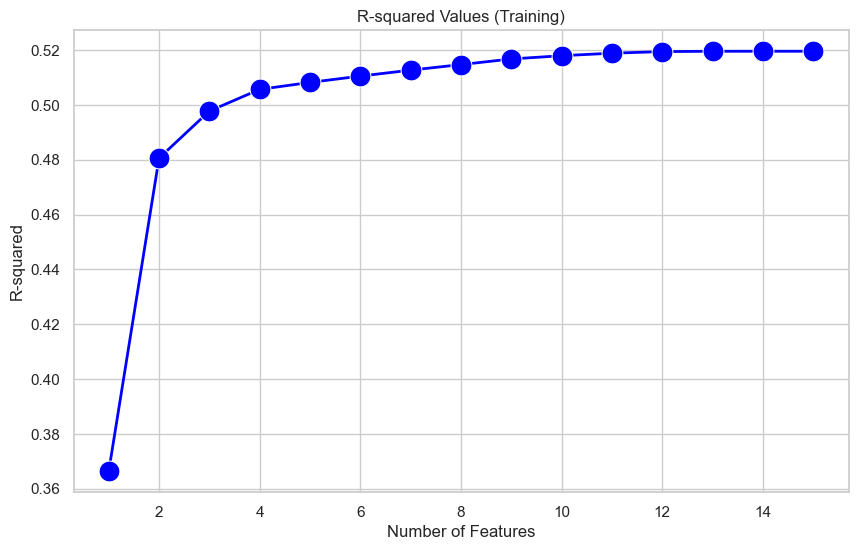

15


In [76]:
x_values = list(range(1, len(R_squared_train) + 1))

# Create the line plot with large circles at each data point
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart with large circles
sns.lineplot(x=x_values, y=R_squared_train, marker='o', markersize=15, color='blue', linewidth=2)

# Set labels and title
plt.xlabel('Number of Features')
plt.ylabel('R-squared')
plt.title('R-squared Values (Training)')

# Show the plot
plt.show()

print(len(R_squared_adj_train))

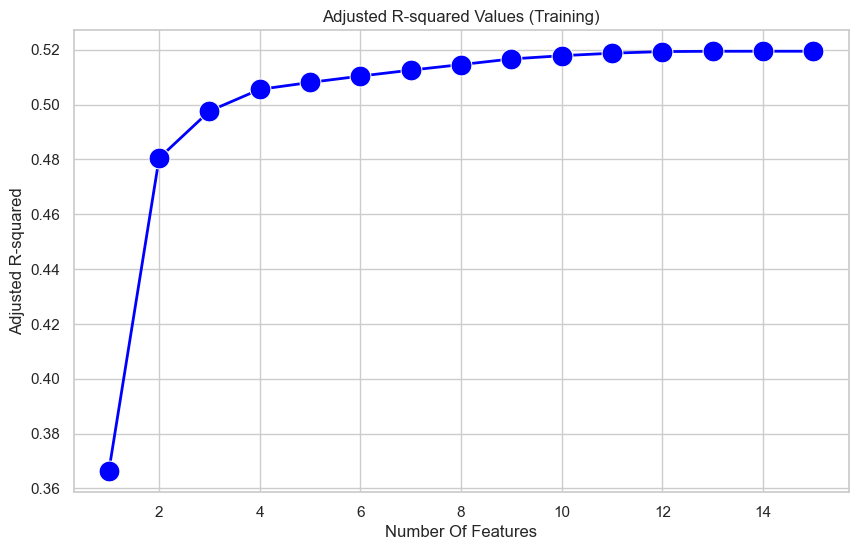

In [90]:
x_values = list(range(1, len(R_squared_train) + 1))

# Create the line plot with large circles at each data point
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart with large circles
sns.lineplot(x= x_values, y= R_squared_adj_train, marker='o', markersize=15, color='blue', linewidth=2)

# Set labels and title
plt.xlabel('Number Of Features')
plt.ylabel('Adjusted R-squared')
plt.title('Adjusted R-squared Values (Training)')

# Show the plot
plt.show()

Our model gives a consistently good ${R^2}$ and ${R_{adj}}{^2}$ values for train data, meaning "log_price" can be explained by our independent variables. 

Both ${R^2}$ and ${R_{adj}}{^2}$ confirm that our model should be good at around 8-10 features. Anything beyond that does not contribute to the significant improvement of our Linear Regression model.


# Visualization

We first investigate the distribution of "log_price"

<AxesSubplot:xlabel='log_price', ylabel='Density'>

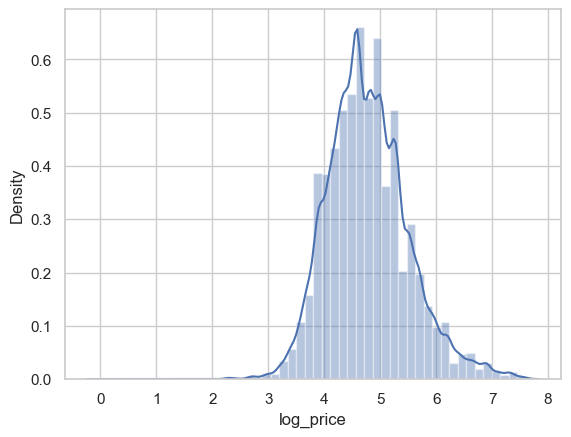

In [91]:
# log_price distribution
sns.distplot(df_encoded["log_price"])

In [88]:
MSE_test = [mean_squared_error(best_lm_of_k[i].predict(testX[list(features_list[i])]), testY) 
            for i in range(15)]
print(MSE_test)

[0.320595657694912, 0.2652340561675327, 0.25714666088539084, 0.25287793711076084, 0.25149657398903674, 0.25024900116222937, 0.24894478240149748, 0.24819659788304152, 0.2469478612602842, 0.24630346701490596, 0.24621301709247873, 0.24581476746235026, 0.24575392590388528, 0.24575114394965825, 0.24575102453396303]


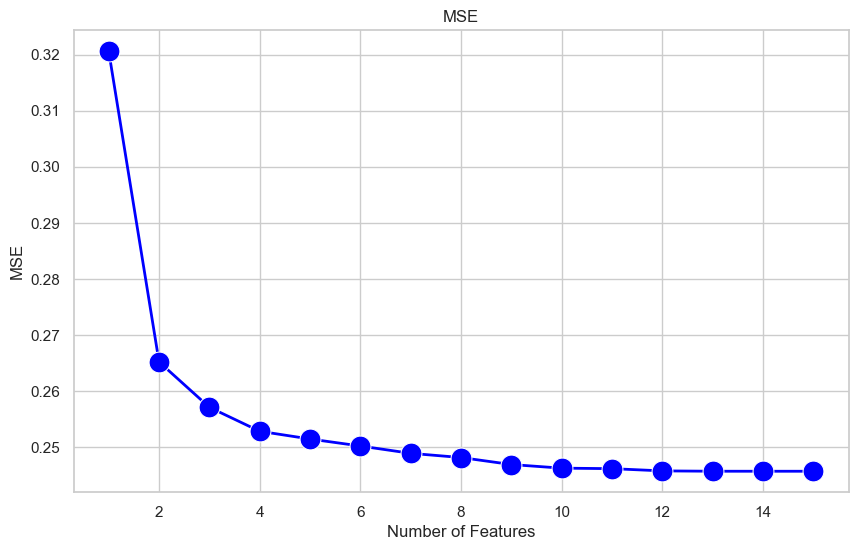

In [92]:
# Create the line plot with large circles at each data point
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line chart with large circles
sns.lineplot(x= x_values, y= MSE_test, marker='o', markersize=15, color='blue', linewidth=2)

# Set labels and title
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('MSE')

# Show the plot
plt.show()

We can see that at 9 features, the model MSE decrease much slower. For the sake of computing cost, I believe it is safe to say the 9 features is complicated enough and gives adequately good prediction on our test data.